In [129]:
# set up and libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import calendar

pd.options.display.max_columns = None

# read the data in 
act_df = pd.read_csv('data/activities.csv')

# do some data cleaning of the column names
act_df.columns = act_df.columns.str.lower()
act_df.columns = act_df.columns.str.replace(' ', '_')

# only select the columns I want 
df2 = (
    act_df
    .filter(regex = 'activity|distance|commute|time|speed|elevation|grade|temperature')
    .copy()
)
# make some new columns for the date and time
df2['year'] = pd.DatetimeIndex(df2['activity_date']).year
df2['month'] = pd.DatetimeIndex(df2['activity_date']).month
df2['month_label'] = df2['month'].apply(lambda x: calendar.month_abbr[x])
df2['time_minutes'] = df2['moving_time']/60
df2['time_hours'] = df2['moving_time']/3600


df2.drop(columns = list(df2.filter(regex='span_class')), inplace = True)

,activity_id,activity_date,activity_name,activity_type,activity_description,elapsed_time,distance,commute,activity_gear,elapsed_time.1,moving_time,distance.1,max_speed,average_speed,elevation_gain,elevation_loss,elevation_low,elevation_high,max_grade,average_grade,average_positive_grade,average_negative_grade,max_temperature,average_temperature,uphill_time,downhill_time,other_time,commute.1,grade_adjusted_distance,weather_observation_time,weather_temperature,apparent_temperature,wind_speed,sunrise_time,sunset_time,year,month,month_label,time_minutes,time_hours
0,193358183,"12 Sep 2014, 08:15:15",Morning Ride,Ride,NaN,540,1.85,False,NaN,540.0,499.0,1853.599976,8.5,NaN,22.470800,NaN,29.5,52.599998,8.0,0.469357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,9,Sep,8.316667,0.138611
1,243603861,"20 Jan 2015, 08:39:24",Morning Ride,Ride,NaN,1588,5.40,False,NaN,1588.0,1182.0,5401.500000,8.9,NaN,10.960000,NaN,2.2,38.500000,8.6,-0.597982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,Jan,19.700000,0.328333
2,243694236,"20 Jan 2015, 17:18:02",Afternoon Ride,Ride,NaN,2421,7.06,False,NaN,2421.0,1833.0,7063.700195,8.4,NaN,73.038803,NaN,2.0,45.500000,10.8,0.552119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,Jan,30.550000,0.509167
3,244848319,"23 Jan 2015, 08:31:31",Morning Ride,Ride,NaN,1574,5.49,False,NaN,1574.0,1227.0,5497.200195,8.5,NaN,11.318200,NaN,2.2,38.500000,9.2,-0.587572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,Jan,20.450000,0.340833
4,244976740,"23 Jan 2015, 17:06:52",Afternoon Ride,Ride,NaN,1299,3.53,False,NaN,1299.0,991.0,3537.899902,8.5,NaN,46.226101,NaN,3.6,46.099998,9.4,1.122130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,Jan,16.516667,0.275278


In [130]:
# total number of each over all years
df3 = (
    df2
    .groupby(['activity_type'])['activity_id']
    .count()
    .reset_index(name="count")
    .sort_values('count', ascending = False)
)

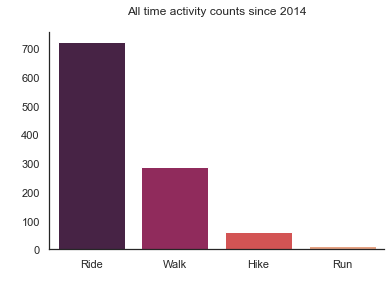

In [131]:
sns.set(font='Helvetica')
sns.set_style('white')

sns.barplot(x = 'activity_type', y = 'count', data = df3, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('All time activity counts since 2014\n');
sns.despine()

In [132]:
# most popular activity each year
all_years = (
    df2
    .groupby(['activity_type', 'year'])['activity_id']
    .count()
    .reset_index(name="count")
    .sort_values(['activity_type','year','count'], ascending = (True,True,False))
)


In [133]:
# total distance and number of rides each year
year_data = (
    df2
    .query("activity_type == 'Ride'")
    .groupby('year')
    .agg(distance_sum = ('distance','sum'), 
         total_rides = ('activity_id', 'count'), 
         time_spent = ('elapsed_time', 'sum'),
         time_spent_moving = ('moving_time', 'sum'),
         total_elevation = ('elevation_gain', 'sum'), 
         total_commutes = ('commute', 'sum'))
    .reset_index()     
)∏

,year,distance_sum,total_rides,time_spent,time_spent_moving,total_elevation,total_commutes
0,2014,1.85,1,540,499.0,22.470800,0
1,2015,2238.77,69,540544,454482.0,15906.077487,0
2,2016,838.45,29,175395,145512.0,5951.298218,5
3,2017,1288.84,34,295939,232350.0,14220.332603,0
4,2018,2023.77,107,522545,404706.0,18827.775206,67
5,2019,4297.93,222,1060224,800857.0,38051.155073,167
6,2020,3881.57,152,1214230,759468.0,39850.288162,29
7,2021,1983.82,107,450437,382325.0,18694.273735,41


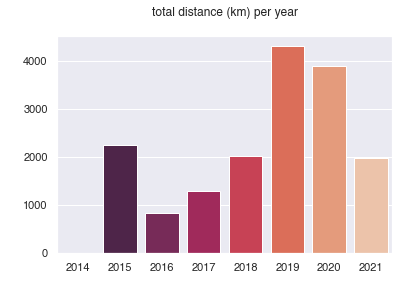

In [146]:
sns.set(font='Helvetica')
sns.set_style()

sns.barplot(x = 'year', y = 'distance_sum', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total distance (km) per year\n');

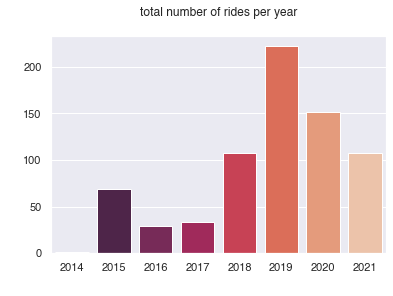

In [145]:
sns.barplot(x = 'year', y = 'total_rides', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total number of rides per year\n');

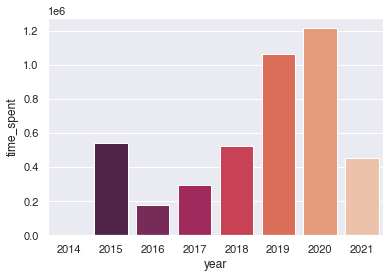

In [137]:
sns.barplot(x = 'year', y = 'time_spent', data = year_data, palette= 'rocket'); 
plt.xlabel(' ')
plt.ylabel(' ')
plt.title('total time spent cycling per year\n');

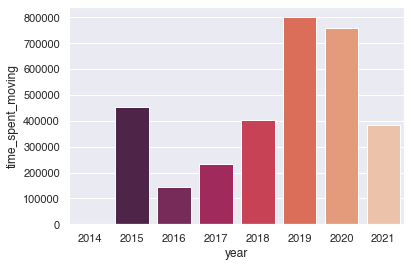

In [138]:
sns.barplot(x = 'year', y = 'time_spent_moving', data = year_data, palette= 'rocket'); 

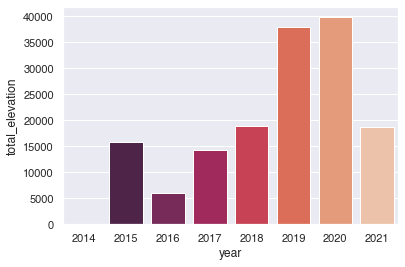

In [139]:
sns.barplot(x = 'year', y = 'total_elevation', data = year_data, palette= 'rocket'); 

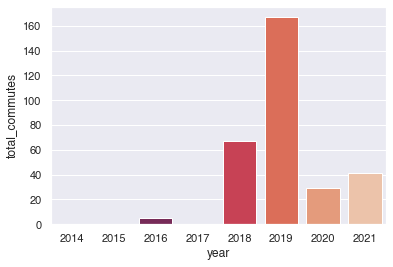

In [140]:
sns.barplot(x = 'year', y = 'total_commutes', data = year_data, palette= 'rocket'); 

In [141]:
dfm = year_data.melt(
    id_vars='year', 
    var_name='category',
    value_name='value'
)

,year,category,value
0,2014,distance_sum,1.85
1,2015,distance_sum,2238.77
2,2016,distance_sum,838.45
3,2017,distance_sum,1288.84
4,2018,distance_sum,2023.77


In [142]:
# g = sns.FacetGrid(dfm, col="category", col_wrap=3)
# g.map_dataframe(sns.barplot, x="year", y = 'value')

In [143]:
month_data = (
    df2
    .query("activity_type == 'Ride'")
    .groupby(['month','month_label'])
    .agg(distance_sum = ('distance','sum'), 
         total_rides = ('activity_id', 'count'), 
         time_spent = ('elapsed_time', 'sum'),
         time_spent_moving = ('moving_time', 'sum'),
         total_elevation = ('elevation_gain', 'sum'), 
         total_commutes = ('commute', 'sum'))
    .sort_values('month', ascending = True)     
)

month_data

,,distance_sum,total_rides,time_spent,time_spent_moving,total_elevation,total_commutes
month,month_label,,,,,,
1,Jan,975.29,45,204949,184920.0,6236.475760,24
2,Feb,820.84,55,188654,158808.0,6504.437423,31
3,Mar,939.39,48,218520,181816.0,8512.417587,25
4,Apr,1811.35,73,455948,349611.0,19641.503378,18
5,May,2102.74,69,625104,429055.0,21404.760775,14
6,Jun,1560.24,72,376902,292406.0,14444.988598,30
7,Jul,1594.88,80,391655,302514.0,13799.420811,45
8,Aug,1929.82,89,504117,376028.0,19341.018459,34
9,Sep,2319.99,76,719821,430489.0,17798.531918,34
